# FACE DETECTION

## Importing the necessary libraries

In [23]:
import sys
sys.path.append("./face-env/Lib/site-packages")

In [6]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## A sample image

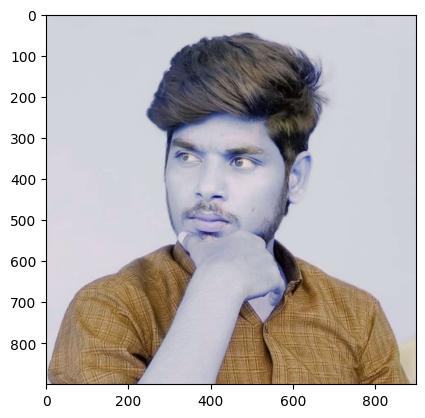

In [28]:
img = cv2.imread('./dataset/images/Imtiaz/imtiaz1.jpg')
plt.imshow(img)

## Detecting the face

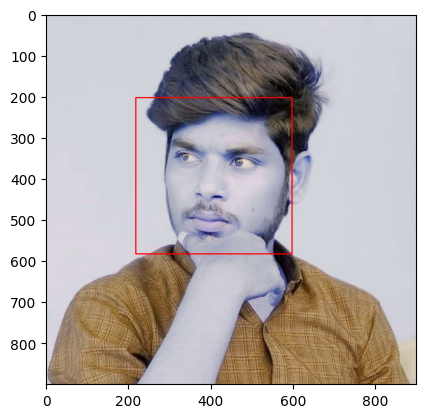

In [30]:
face_cascade = cv2.CascadeClassifier('./models/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./models/haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
(x,y,w,h) = faces[0]
x,y,w,h

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

## Detecting the eyes

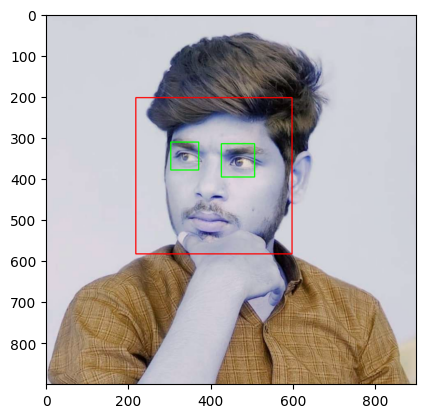

In [31]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Cropping the image

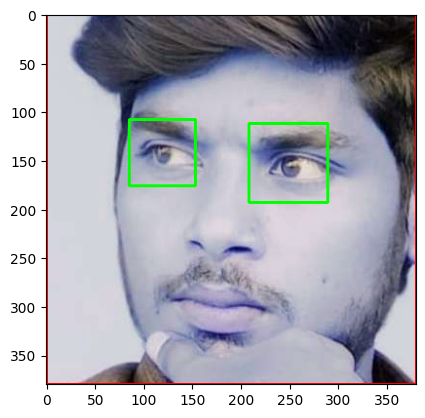

In [32]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

## Applying the image cleaning process to all the images

In [9]:
path_to_data = "./dataset/images/"
path_to_cr_data = "./dataset/cropped/"

In [10]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [12]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [16]:
face_cascade = cv2.CascadeClassifier('./models/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./models/haarcascade_eye.xml')

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if not entry.is_file() or not entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Skipping non-image file: {entry.path}")
            continue

        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is None:
                print(f"Skipping {entry.path}: No valid face with 2 eyes detected")
                continue

            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)

            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

        except Exception as e:
            print(f"Error processing {entry.path}: {str(e)}")
            continue  # Move to the next image


Ahmad
Skipping ./dataset/images/Ahmad\ahmad-1.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0036.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0038.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0039.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0040.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0041.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0042.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0043.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0048.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0049.jpg: No valid face with 2 eyes detected
Skipping ./dataset/images/Ahmad\IMG-20250305-WA0050.jpg: No valid face with 2 eyes det

## Augmenting the images to increase the dataset size

In [26]:
import os
import cv2
import numpy as np
import random

# Input and output directories
input_dir = "./dataset/cropped"
output_dir = "./dataset/augmented_cropped"

def augment_image(image):
    """Applies a series of random augmentations to the image."""
    # Horizontal Flip
    if random.random() > 0.5:
        image = cv2.flip(image, 1)

    # Rotation
    angle = random.randint(-30, 30)
    h, w = image.shape[:2]
    matrix = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    image = cv2.warpAffine(image, matrix, (w, h))

    # Scaling
    scale = random.uniform(0.8, 1.2)
    image = cv2.resize(image, (int(w * scale), int(h * scale)))

    # Cropping (random 80-100% of image)
    crop_x = random.randint(0, w//5)
    crop_y = random.randint(0, h//5)
    image = image[crop_y:h-crop_y, crop_x:w-crop_x]

    # Brightness/Contrast
    alpha = random.uniform(0.7, 1.3)  # Contrast
    beta = random.randint(-30, 30)  # Brightness
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    return image

# Process each subfolder
for folder in os.listdir(input_dir):
    folder_path = os.path.join(input_dir, folder)
    output_folder_path = os.path.join(output_dir, folder)

    if not os.path.isdir(folder_path):
        continue  # Skip if not a directory

    # Create output folder if it doesn't exist
    os.makedirs(output_folder_path, exist_ok=True)

    images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    num_images = len(images)

    if num_images == 0:
        print(f"No images found in {folder_path}, skipping...")
        continue

    count = num_images + 1  # Start numbering from next available index

    while len(images) < 50:  # Ensure at least 50 images
        # Pick a random image to augment
        img_name = random.choice(images)
        img_path = os.path.join(folder_path, img_name)

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error loading {img_path}, skipping...")
            continue

        # Apply augmentation
        augmented_img = augment_image(img)

        # Save new image in the corresponding output folder
        new_img_name = f"{folder}_{count}.png"
        new_img_path = os.path.join(output_folder_path, new_img_name)
        cv2.imwrite(new_img_path, augmented_img)

        images.append(new_img_name)  # Add new image to list
        count += 1  # Increment counter

    print(f"Augmentation complete for {folder_path}, saved in {output_folder_path}, now contains {len(images)} images.")


Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_3.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_3.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_4.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_3.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_3.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skipping...
Error loading ./dataset/cropped\Ahmad\Ahmad_2.png, skip